### Importing Library

In [27]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



### Pre Processing Data

In [28]:
# Importing Dataset
data_train_path = "datasets/fruits-vegetables/train"
data_test_path = "datasets/fruits-vegetables/test"
data_validation_path = "datasets/fruits-vegetables/validation"

In [29]:
# Width And Height Img Size Param
img_width = 180
img_height = 180

In [30]:
data_train = tf.keras.utils.image_dataset_from_directory(
  data_train_path,
  shuffle=True,
  image_size=(img_width,img_height),
  batch_size=32,
  validation_split=False)

Found 3115 files belonging to 36 classes.


In [57]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [31]:
data_cat = data_train.class_names

In [32]:
data_val = tf.keras.utils.image_dataset_from_directory(
  data_validation_path,
  image_size=(img_width,img_height),
  batch_size=32,
  shuffle=False,
  validation_split=False
)

Found 351 files belonging to 36 classes.


In [33]:
data_test = tf.keras.utils.image_dataset_from_directory(
  data_test_path,
  image_size=(img_width,img_height),
  shuffle=False,
  batch_size=32,
  validation_split=False
)

Found 359 files belonging to 36 classes.


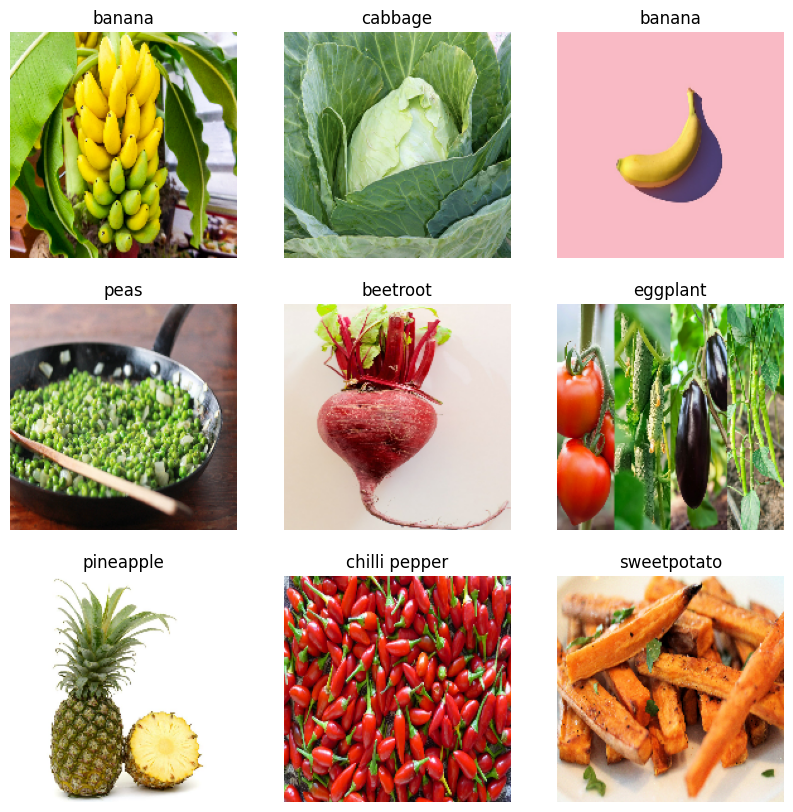

In [34]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_cat[labels[i]])
    plt.axis('off')

### Model Creation

In [37]:
from tensorflow.keras.models import Sequential

In [38]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [40]:
model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Conv2D(64,3, padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(units= len(data_cat))
])

In [41]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [42]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size,batch_size=32,verbose=1)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 319ms/step - accuracy: 0.0584 - loss: 3.5788 - val_accuracy: 0.3903 - val_loss: 2.2742
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.2687 - loss: 2.4873 - val_accuracy: 0.5613 - val_loss: 1.5733
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.4367 - loss: 1.9377 - val_accuracy: 0.7094 - val_loss: 1.0788
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.5458 - loss: 1.5225 - val_accuracy: 0.7977 - val_loss: 0.7899
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.7015 - loss: 1.0546 - val_accuracy: 0.8860 - val_loss: 0.4691
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.8062 - loss: 0.6939 - val_accuracy: 0.9060 - val_loss: 0.3655
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.8774 - loss: 0.4302 - val_accuracy: 0.9259 - val_loss: 0.2817
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - accuracy: 0.9346 - loss: 0.2644 - val_accu

Text(0.5, 1.0, 'Loss')

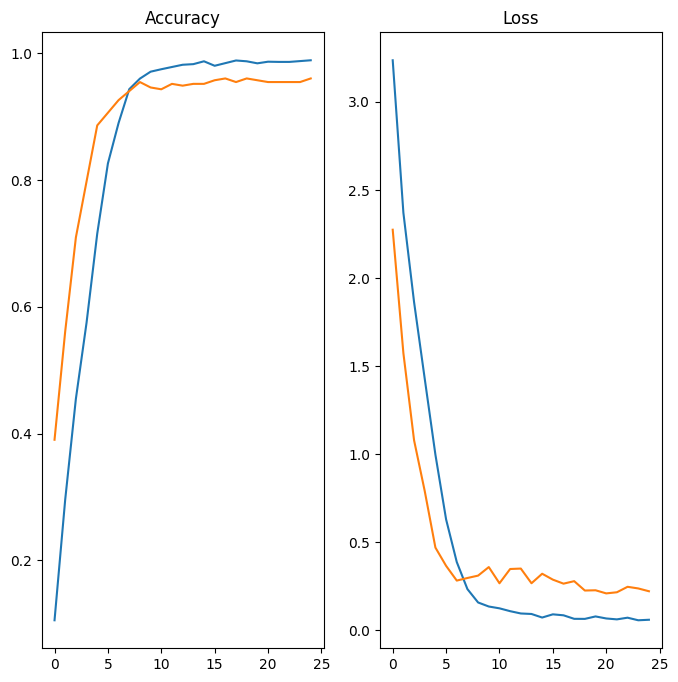

In [43]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = "Trainning Accuracy")
plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = "Trainning Loss")
plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")
plt.title("Loss")

### Predicting Values From Model

In [52]:
image = "banana.jpeg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [53]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [54]:
score = tf.nn.softmax(predict)

In [55]:
print("Veg/Fruit in image is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(score)], np.max(score)*100))

Veg/Fruit in image is banana with accuracy of 91.30


In [56]:
model.save("Image_classify.keras")